In [27]:
# Suport Vector Machine
# classificação linear da SVM
# funciona bem em dados linearmente separáveis
# pode ser usado para regressão

# classificação de margem suave
# classificação de margem rígida

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [28]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [29]:
# Classificação SVM não linear
# adicionar características polinomiais
# adicionar similaridade de características gaussiana (RBF) - kernel gaussiano
# adicionar similaridade de características gaussiana (RBF) - kernel polinomial
# adicionar similaridade de características gaussiana (RBF) - kernel sigmóide


In [30]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

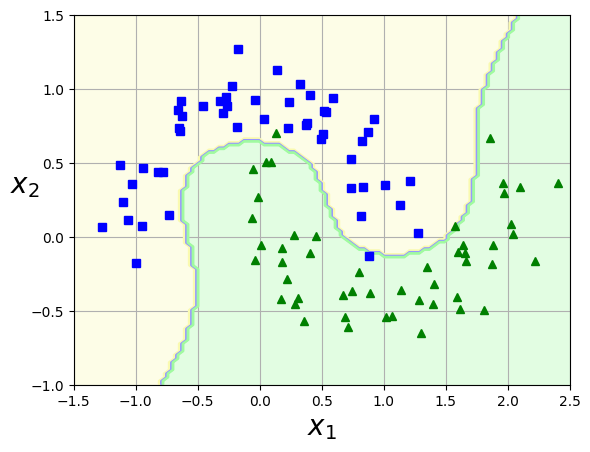

In [31]:
# plotando gráfico
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dataset(X, y, axes):
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
        
        x0s = np.linspace(axes[0], axes[1], 100)
        x1s = np.linspace(axes[2], axes[3], 100)
        
        x0, x1 = np.meshgrid(x0s, x1s)
        X = np.c_[x0.ravel(), x1.ravel()]
        
        y_pred = clf.predict(X).reshape(x0.shape)
        
        custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
        
        plt.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
        plt.contour(x0, x1, y_pred, cmap=custom_cmap)
    
# plotando gráfico
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

    

In [32]:
# kernel polinomial
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

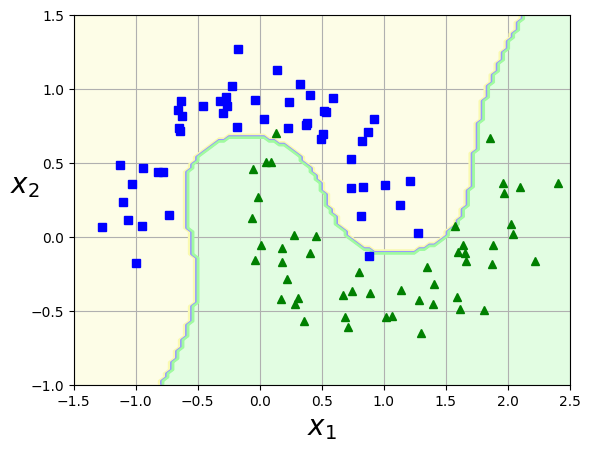

In [33]:
# plotando gráfico
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

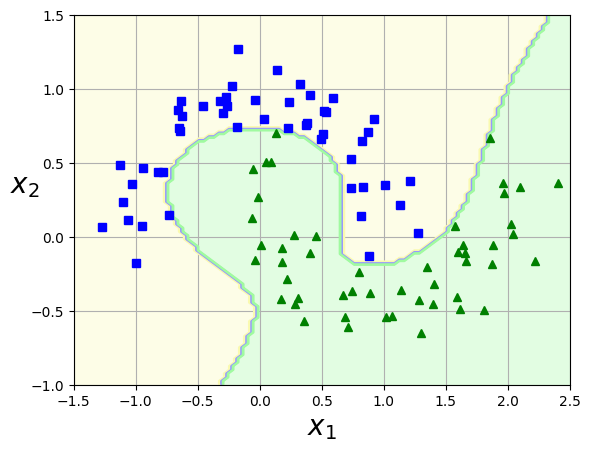

In [34]:

# um de grau 3 e outro de grau 10
# coef0 controla até que ponto o modelo é influenciado por polinômios de grau alto versus baixo

poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly100_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


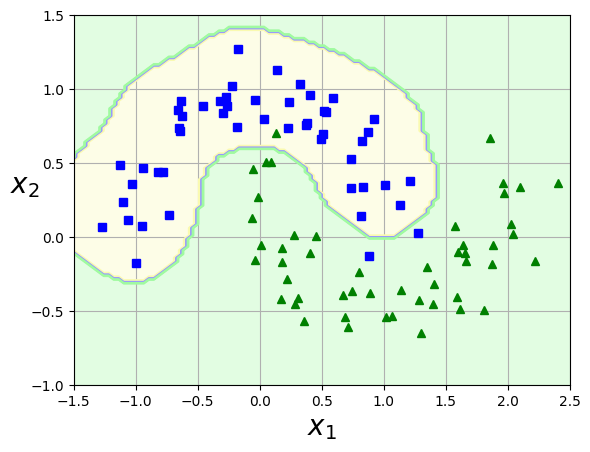

In [35]:
# Características de similaridade gaussiana (RBF)
# adiciona características de similaridade de base radial
# aumenta as características de cada instância
# torna o conjunto de dados linearmente separável
# gamma controla a largura da curva gaussiana
# aumentar gamma torna as curvas mais estreitas
# cada instância influencia apenas as instâncias próximas
# evita o problema de dimensionalidade

# kernel gaussiano
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])



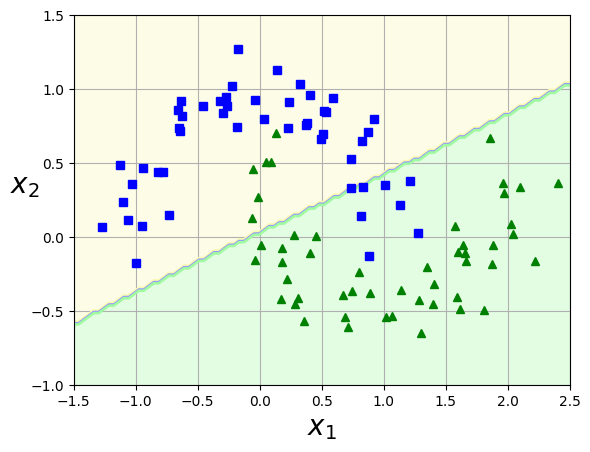

In [36]:
# alteração do valor de gamma
# gamma = 0.1
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


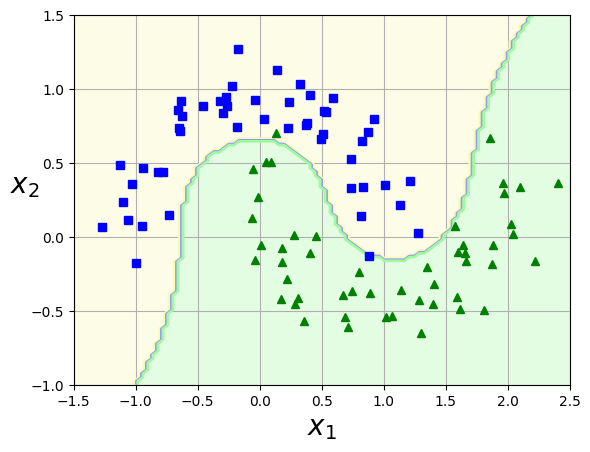

In [37]:
# gamma = 0.1 C = 1000
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

rbf_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

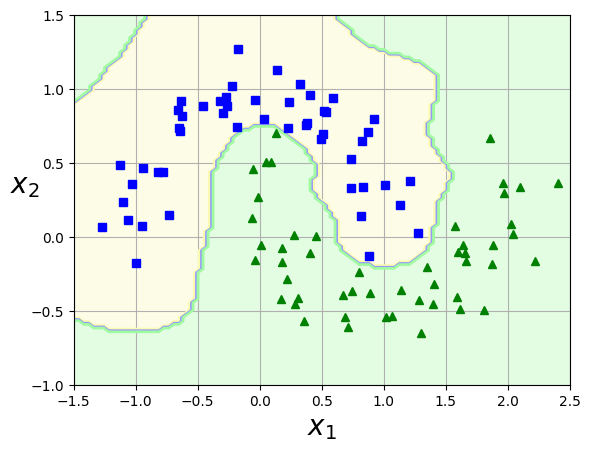

In [38]:
# gamma = 5 C = 1000
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

rbf_kernel_svm_clf.fit(X, y)

# plotando gráfico
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


In [39]:
# complexidade computacional
# LinearSVC é baseado no algoritmo de otimização liblinear
# não suporta kernel
# adequado para conjuntos de treinamento pequenos ou médios
# SVC é baseado no algoritmo de otimização libsvm
# suporta kernel
# adequado para conjuntos de treinamento pequenos ou médios
# SGDClassifier é baseado no algoritmo SGD
# adequado para conjuntos de treinamento muito grandes
# LinearSVC é mais rápido que SVC(kernel="linear")
# LinearSVC não suporta kernel, mas é mais rápido
# SVC(kernel="linear") é mais lento, mas suporta kernel
# LinearSVC deve ser escalado usando StandardScaler antes de treinar (ou usar SVC(kernel="linear"))
# LinearSVC regulariza o viés, enquanto SVC não o faz (definindo loss="hinge") - bias é o termo de erro
# LinearSVC usa a perda de chara hinge, enquanto SVC usa a perda de chara squared hinge
# SVC e LinearSVC produzem resultados semelhantes (mas não idênticos) na classificação de conjuntos de dados lineares separáveis 
# (por exemplo, a classe LinearSVC (penalty="l2") tem resultados muito semelhantes ao SVC (kernel="linear"))
# SVC e LinearSVC produzem resultados muito diferentes na classificação de conjuntos de dados não lineares separáveis



In [42]:
# Regressão SVM
# SVM pode ser usado para regressão
# inverso da classificação
# objetivo: ajustar o maior margem possível entre duas classes
# regressão: ajustar o maior margem possível dentro da margem
# margem é controlada por hiperparâmetros
# largura da margem é controlada por epsilon
# epsilon = 0: sem margem
# epsilon = infinito: mesma margem
# epsilon é um hiperparâmetro de regularização (como C) - quanto maior o valor de epsilon, mais suave o modelo será 
# (menos sensível aos outliers)

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5, random_state=42)

c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


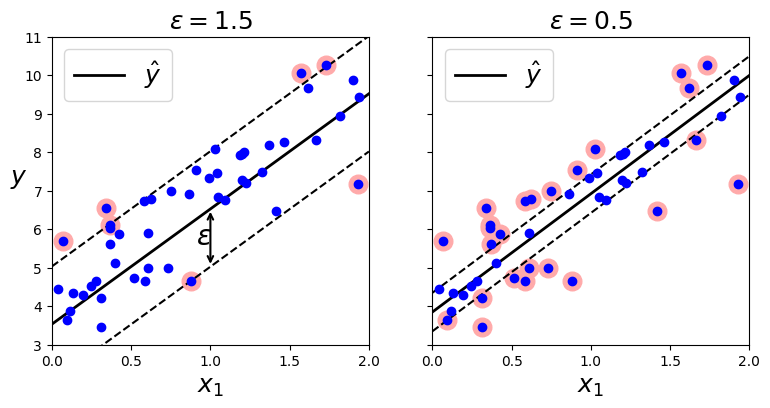

In [44]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

#  Vetores de suporte são os pontos que estão dentro ou na borda da margem.
# Retorna os índices dos vetores de suporte.
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

# Os vetores de suporte são atribuídos aos modelos usando o atributo support_.
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()